In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#импорт библиотек

In [104]:
ca = pd.read_csv('/home/user/sas/Nova-main/the_unlimited_power.csv')
ca.head(4000)



,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,ID 69265912,homeowner,https://dolgoprudny.cian.ru/sale/flat/307775344/,Долгопрудный,sale,flat,1,2,2,45.0,...,-1,-1,5 м²,+79623630735,3 м,NaN,25-го съезда,12,Шереметьевская,NaN
3996,NaN,NaN,https://dolgoprudny.cian.ru/sale/flat/302781976/,Долгопрудный,sale,flat,20,23,2,60.0,...,"Без отделки, чистовая",-1,-1,+74951384886,"2,8 м",NaN,NaN,NaN,Хлебниково,Бригантина ЖК
3997,Галант,real_estate_agent,https://dolgoprudny.cian.ru/sale/flat/308109678/,Долгопрудный,sale,flat,6,18,2,67.7,...,-1,35 м²,16 м²,+79850427471,-1,NaN,Набережная,23к1,Водники,Московские водники
3998,Галант,real_estate_agent,https://dolgoprudny.cian.ru/sale/flat/302243443/,Долгопрудный,sale,flat,7,9,2,38.2,...,-1,"27,4 м²",5 м²,+79850427471,-1,NaN,Лихачевское шоссе,1б,Долгопрудная,NaN


In [105]:
ca.drop(['deal_type', 'author_type', 'url', 'author', 'accommodation_type', 'house_number', 'phone', 'heating_type', 'finish_type', 'have_loggia', 'house_material_type', 'ceiling_height', 'floors_count'], axis=1, inplace=True)
ca.replace('-1', np.nan, inplace=True)
ca.head(8)


#Большинство удалённых данных не нужны для обучения машины, поэтому сразу же удалены. Относительно высоты потолка(ceiling_height) сделан вывод, что она указывается меньше чем в 50% объявлений, а так же практически никак не влияет на цену за метр квадратный.

,location,floor,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,district,street,underground,residential_complex
0,Серпухов,6,1,20.7,2350000,1917,Вторичка,Наземная,18 м²,1 м²,Серпухов,Крюкова,NaN,NaN
1,Серпухов,1,1,33.0,4150000,1975,Вторичка,NaN,18 м²,6 м²,NaN,Ворошилова,Аннино,NaN
2,Серпухов,4,1,14.0,1700000,NaN,Вторичка,NaN,NaN,NaN,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,Серпухов,5,1,17.5,2500000,1968,Вторичка,NaN,NaN,NaN,Серпухов,Российская,NaN,NaN
4,Серпухов,4,1,25.9,3000000,2009,Вторичка,Наземная,20 м²,5 м²,Серпухов,Химиков,NaN,NaN
5,Серпухов,2,1,46.7,6599999,NaN,Вторичка,NaN,25 м²,6 м²,Серпухов,2-я Московская,NaN,NaN
6,Серпухов,3,1,29.0,3350000,1917,Вторичка,Наземная,25 м²,NaN,Серпухов,Форсса,NaN,NaN
7,Серпухов,3,1,19.1,3600000,1917,Вторичка,NaN,NaN,NaN,Серпухов,Крюкова,NaN,NaN


In [106]:
ca = ca.drop_duplicates()

#снос дубликатов

In [107]:
ca.shape

#подсчёт строчек и колонок

(7206, 14)

In [108]:
ca.info()

#информация о дата-сете, без лишних данных

<class 'pandas.core.frame.DataFrame'>
Index: 7206 entries, 0 to 8392
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7205 non-null   object
 1   floor                 7205 non-null   object
 2   rooms_count           7112 non-null   object
 3   total_meters          7205 non-null   object
 4   price                 7192 non-null   object
 5   year_of_construction  5955 non-null   object
 6   object_type           7205 non-null   object
 7   parking_type          4038 non-null   object
 8   living_meters         5599 non-null   object
 9   kitchen_meters        6004 non-null   object
 10  district              2869 non-null   object
 11  street                5714 non-null   object
 12  underground           5002 non-null   object
 13  residential_complex   3632 non-null   object
dtypes: object(14)
memory usage: 844.5+ KB


<Axes: >

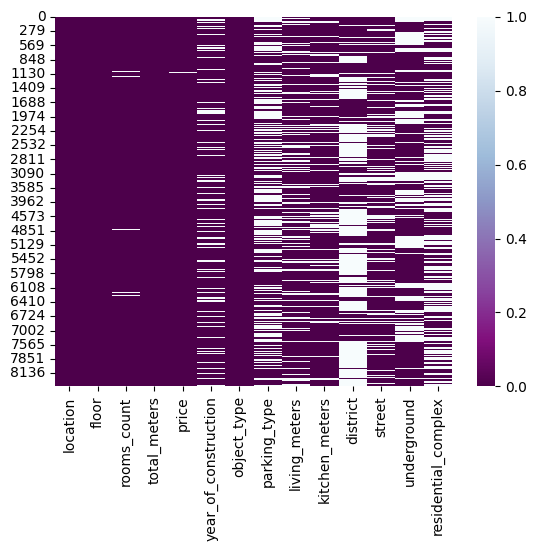

In [109]:
sns.heatmap(ca.isnull(), cmap='BuPu_r')

#в district(районе) подозрительно много пропусков, как и в underground(метро) с street(улица)

In [110]:
null_counts_cian = ca.isnull().sum().reset_index()
null_counts_cian.columns = ['Column', 'Null Count']

print(null_counts_cian)

#подсчитываем отсутствующие значения

                  Column  Null Count
0               location           1
1                  floor           1
2            rooms_count          94
3           total_meters           1
4                  price          14
5   year_of_construction        1251
6            object_type           1
7           parking_type        3168
8          living_meters        1607
9         kitchen_meters        1202
10              district        4337
11                street        1492
12           underground        2204
13   residential_complex        3574


In [111]:
ca['district'] = ca['district'].fillna(ca['location'])
ca['street'] = ca['street'].fillna(ca['district'])
ca['parking_type'] = ca['parking_type'].fillna(ca['street'])
ca['underground'] = ca['underground'].fillna(ca['street'])
ca = ca.drop(index=1)

columns_to_check = ['location', 'floor', 'total_meters', 'price', 'rooms_count', 'object_type', 'rooms_count', 'kitchen_meters', 'year_of_construction', 'living_meters', 'residential_complex']
ca_cleaned = ca.dropna(subset=columns_to_check, inplace=True)

#убираем пропуски у самых проблемых, при помощи замен значений и чистки

In [112]:
null_counts_cian = ca.isnull().sum().reset_index()
null_counts_cian.columns = ['Column', 'Null Count']

print(null_counts_cian)

#перепроверка успешна

                  Column  Null Count
0               location           0
1                  floor           0
2            rooms_count           0
3           total_meters           0
4                  price           0
5   year_of_construction           0
6            object_type           0
7           parking_type           0
8          living_meters           0
9         kitchen_meters           0
10              district           0
11                street           0
12           underground           0
13   residential_complex           0


<Axes: >

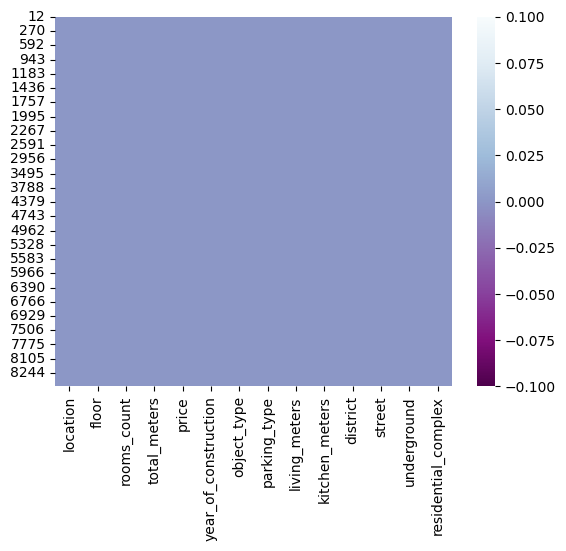

In [113]:
sns.heatmap(ca.isnull(), cmap='BuPu_r')

#тада! все NaN убраны и хитмапа выглядит идеально

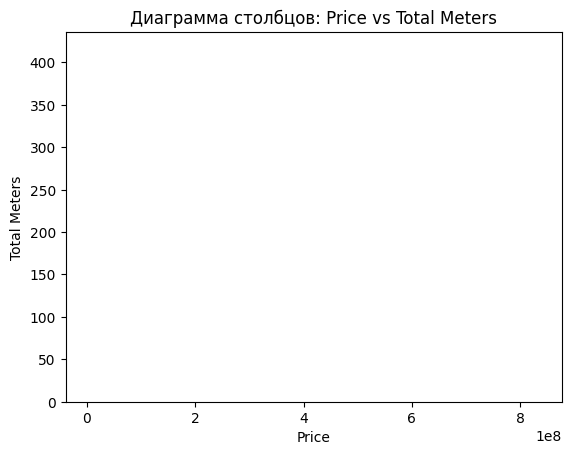

In [114]:
ca['total_meters'] = pd.to_numeric(ca['total_meters'], errors='coerce')
ca['price'] = pd.to_numeric(ca['price'], errors='coerce')


ca = ca.dropna(subset=['total_meters', 'price'])


plt.bar(ca['price'], ca['total_meters'])


plt.title('Диаграмма столбцов: Price vs Total Meters')
plt.xlabel('Price')
plt.ylabel('Total Meters')


plt.show()

#диаграммы отказываются работать, какой бы датафрейм не использовался

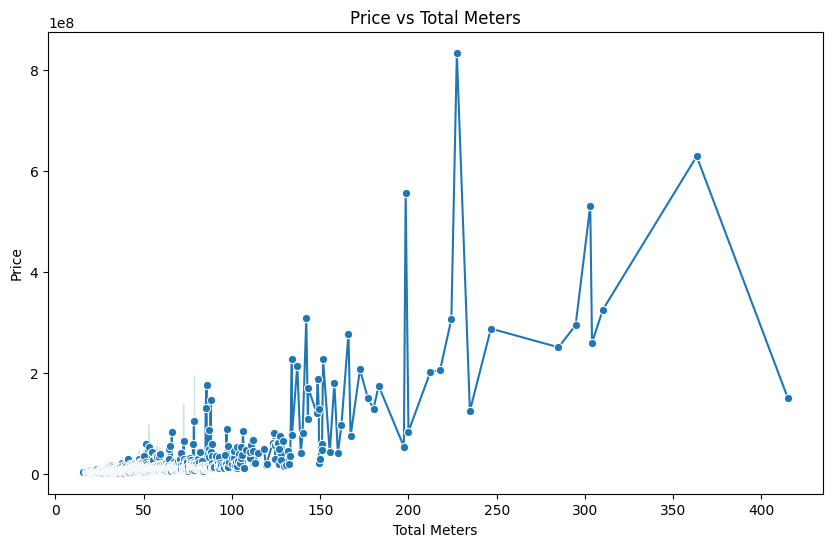

In [115]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=ca, x='total_meters', y='price', marker='o')


plt.title('Price vs Total Meters')
plt.xlabel('Total Meters')
plt.ylabel('Price')

plt.show()

#великая чернобыльская аномалия, не дающая этому коду появиться в виде диаграммы

In [116]:
ca['price'] = pd.to_numeric(ca['price'], errors='coerce')
ca['total_meters'] = pd.to_numeric(ca['total_meters'], errors='coerce')
ca['price_for_metre'] = ca['price'] / ca['total_meters'].replace(0, pd.NA)

ca.head(12)

#наконец-то найденная цена за метр

,location,floor,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,district,street,underground,residential_complex,price_for_metre
12,Серпухов,15,1,20.55,2600000.0,2025,Новостройка,Наземная,"13,4 м²",3 м²,мкр. Востряково,Ледовская,Ледовская,Солнечный,1.265207e+05
42,Серпухов,2,2,38.40,6700000.0,2013,Вторичка,Наземная,17 м²,11 м²,Серпухов,Ворошилова,Ворошилова,по ул. Ворошилова,1.744792e+05
56,Серпухов,2,1,59.00,11300000.0,2011,Вторичка,Наземная,"18,1 м²",20 м²,Серпухов,Советская,Советская,Советская 70А,1.915254e+05
63,Дубна,5,1,50.00,9550000.0,2019,Вторичка,Наземная,25 м²,10 м²,Дубна,Программистов,Программистов,на ул. Программистов,1.910000e+05
107,Москва,15,3,82.80,39578400.0,2026,Новостройка,Подземная,"52,1 м²",10 м²,Басманный,Фридриха Энгельса,Бауманская,Дом 56,4.780000e+05
108,Москва,11,3,87.02,32910964.0,2024,Новостройка,Даниловский,"39,1 м²","34,3 м²",Даниловский,Даниловский,Тульская,Форст ЖК,3.782000e+05
109,Москва,4,3,103.70,40291971.0,2024,Новостройка,Береговой проезд,"35,2 м²","25,5 м²",Филевский парк,Береговой проезд,Фили,Береговой-2,3.885436e+05
120,Москва,2,1,45.70,21798900.0,2026,Новостройка,Подземная,"26,8 м²","7,8 м²",Басманный,Фридриха Энгельса,Бауманская,Дом 56,4.770000e+05
123,Москва,5,1,65.90,82172522.0,2023,Новостройка,Костикова,"18,8 м²","24,9 м²",Пресненский,Костикова,Улица 1905 года,Lucky,1.246927e+06
124,Москва,3,1,59.00,61800000.0,2023,Новостройка,Подземная,39 м²,15 м²,Пресненский,Костикова,Улица 1905 года,Lucky,1.047458e+06


In [117]:
min_max_values = {
    'year_of_construction': (1952, 2025),  
    'rooms_count': (1, 5)   
}


cleaned_ca = pd.DataFrame()


for column in ca.columns:
    if column in min_max_values:
        
        ca[column] = pd.to_numeric(ca[column], errors='coerce')
        
        min_value, max_value = min_max_values[column]
        
       
        filtered_column = ca[column][(ca[column] >= min_value) & (ca[column] <= max_value)]
        
        
        cleaned_ca[column] = filtered_column.reset_index(drop=True)
        #даём мин. и макс. лимиты для определённых колонок

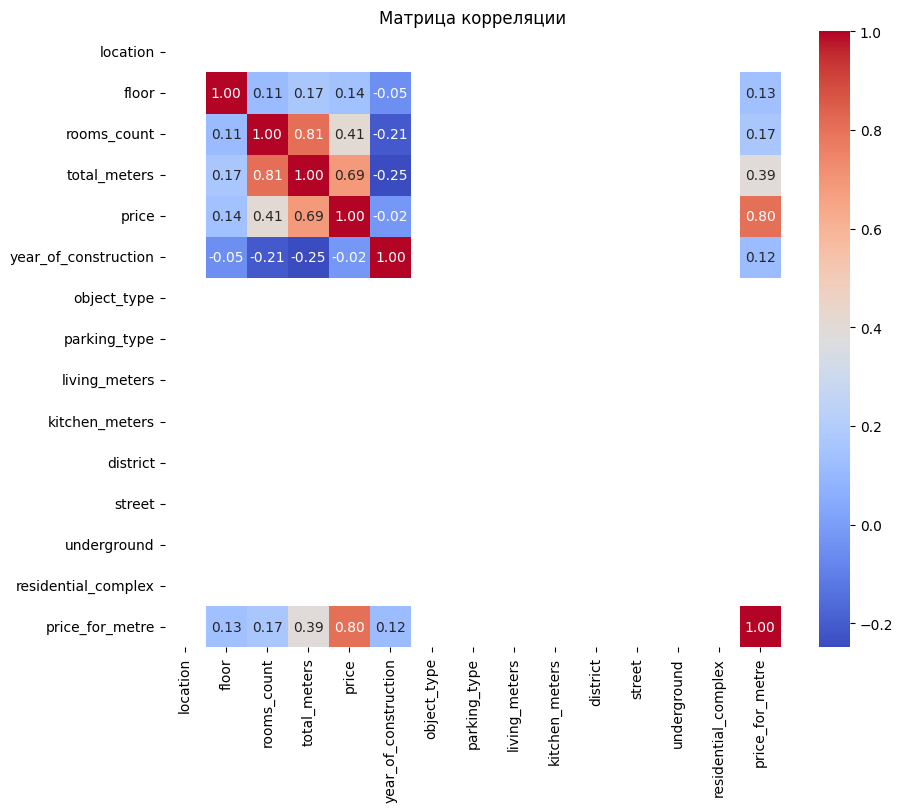

In [122]:
ca = ca.apply(pd.to_numeric, errors='coerce')


correlation_matrix = ca.corr()


plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)


plt.title('Матрица корреляции')


plt.show()